![miad4.png](Archivos/miad4.png)

# Laboratorio 1

## Desarrollo de una herramienta analítica usando recursos nativos de Python

Para el desarrollo de esta actividad debes utilizar únicamente recursos nativos de Python (puedes usar librerías como `math` y `random`). Está prohibido el uso de librerías externas, a excepción de `matplotlib`. Te recomendamos leer por completo el enunciado del laboratorio antes de comenzar, de forma que tengas claro el propósito global de la actividad y puedas desarrollar tu solución apuntando a él desde el inicio.

En algunas de las misiones encontrarás: una **versión base**, la cual indica el requerimiento mínimo de la misión; una **versión completa**, la cual indica mejoras deseables o complementos a la **versión base**. Un desarrollo aceptable del laboratorio debe satisfacer la **versión base** y un desarrollo correcto del laboratorio debe satisfacer la **versión completa**. Cumplir con el desarrollo de la **versión completa** desde un inicio hará más sencillas las misiones siguientes.

Al desarrollar este laboratorio pondrás a prueba tus habilidades para:

1. Identificar y abordar preguntas de negocio y de *analytics*.
2. Leer datos desde archivos y almacenarlos en estructuras de Python.
3. Crear y llamar funciones.
4. Implementar condicionales diferenciando `if`, `elif` y `else`.
5. Implementar ciclos diferenciando el propósito de `for` y `while`.

## Contexto: exploración del potencial para asignar becas Unialpes

La Universidad de los Alpes se ha caracterizado por su compromiso con la generación de impacto en la sociedad a través de diferentes programas de becas. Programas como Becas para los Mejores, entre otros, han sido revolucionarios al permitir que estudiantes de bajos recursos puedan acceder a una de las universidades más prestigiosas del país.

Actualmente, la universidad quiere evaluar el potencial impacto que tendrían algunos programas de acción afirmativa para asignación de becas, con base en información demográfica que ha obtenido a través de encuestas a personas interesadas en becas. Se cuenta con información respecto a la edad, género, estado civil, estrato socioeconómico, región de proveniencia, desempeño académico y nivel de escolaridad de las personas encuestadas. Los encargados de diseñar el programa saben que utilizar criterios basados en este tipo de variables es un tema sensible, pero es necesario si se quieren focalizar las oportunidades en poblaciones menos representadas.

El objetivo de este laboratorio es crear una herramienta computacional que permita a un tomador de decisiones explorar qué efecto podría tener el uso de diferentes reglas para seleccionar a los beneficiarios de las becas. Puntualmente, se espera que, para distintas reglas de selección (ej., pertenecer a cierta región, rango de edad, etc.), la herramienta ofrezca una caracterización de los potenciales beneficiarios de las becas (a partir de estadísticas descriptivas y visualizaciones), de forma que exista un sustento para elegir la regla de selección adecuada.

## Fase 1: obtener e inspeccionar archivos

Los datos de encuestas fueron obtenidos como parte de un trabajo de campo y, por limitaciones tecnológicas, solo se cuenta con la información en archivos de texto plano (`.txt`). Cada archivo corresponde a uno de los atributos antes mencionados y están estructurados de forma que todos relacionan a las personas encuestadas en el mismo orden (i.e., en cada archivo la primera línea corresponde a un dato de la primera persona encuestada, la segunda línea corresponde a un dato de la segunda persona encuestada, etc.).

Los archivos con los que cuentas son:

* `"edad.txt"`: un archivo con la edad de cada persona encuestada;
* `"escolaridad.txt"`: un archivo con el nivel de escolaridad de cada persona encuestada;
* `"estado_civil.txt"`: un archivo con el estado civil de cada persona encuestada;
* `"estrato.txt"`: un archivo con el estrato socioeconómico de cada persona encuestada;
* `"genero.txt"`: un archivo con el género de cada persona encuestada;
* `"promedio.txt"`: un archivo con el promedio académico de cada persona encuestada;
* `"region.txt"`: un archivo con la región de proveniencia de cada persona encuestada.

### Misión 1

**Versión base**: utiliza métodos de lectura de archivos para guardar la información de cada archivo en una estructura de datos de Python, de manera que se respete el orden y la categoría de los datos.

**Versión completa**: escribe una función que sea capaz de ejecutar la **versión base** y llámala dentro de un ciclo para automatizar la lectura de los archivos.

In [1]:
# Implementa tu respuesta en esta celda

def open_file(file):
    f=  open(file, 'r')
    return ''.join(f.readlines()).split('\n')[:-1]

# Version completa -list comprehension es un ciclo- 

#Si no, sería:
#for file ine 

(edad, escolaridad, estado_civil, 
 estrato, genero, promedio, region )=[open_file(f"Archivos/{file}.txt")
                                      for file in ["edad", "escolaridad", "estado_civil", 
 "estrato", "genero", "promedio", "region"]]


data = {'edad':edad, 'escolaridad':escolaridad,
                'estado_civil':estado_civil, 'estrato':estrato,
   'genero':genero, "promedio":promedio, 'region':region}



In [2]:
diccionario_datos ={i:{promedio[i]:{'edad':edad[i], 'escolaridad':escolaridad[i],
                'estado_civil':estado_civil[i], 'estrato':estrato[i],
   'genero':genero[i], 'region':region[i]}} for i in range(len(edad))}

datos_ordenados=dict(sorted( diccionario_datos.items(), key=lambda item: list(item[1].keys()), reverse=True))
datos_ordenados

{243: {'5.0': {'edad': '59',
   'escolaridad': 'Secundaria',
   'estado_civil': 'divorciada',
   'estrato': '2',
   'genero': 'femenino',
   'region': 'Region_4'}},
 376: {'5.0': {'edad': '69',
   'escolaridad': 'Secundaria',
   'estado_civil': 'soltera',
   'estrato': '1',
   'genero': 'masculino',
   'region': 'Region_2'}},
 7: {'4.9': {'edad': '54',
   'escolaridad': 'Secundaria',
   'estado_civil': 'casada',
   'estrato': '2',
   'genero': 'femenino',
   'region': 'Region_1'}},
 60: {'4.9': {'edad': '75',
   'escolaridad': 'Primaria',
   'estado_civil': 'casada',
   'estrato': '3',
   'genero': 'femenino',
   'region': 'Region_4'}},
 162: {'4.9': {'edad': '47',
   'escolaridad': 'Secundaria',
   'estado_civil': 'casada',
   'estrato': '1',
   'genero': 'masculino',
   'region': 'Region_1'}},
 207: {'4.9': {'edad': '21',
   'escolaridad': 'Profesional',
   'estado_civil': 'casada',
   'estrato': '2',
   'genero': 'femenino',
   'region': 'Region_1'}},
 363: {'4.9': {'edad': '32',
  

### Misión 2

**Versión base**: calcula estadísticas descriptivas básicas (por lo menos, media/mediana y varianza/desviación) para cada variable relevante en el contexto del problema y repórtalas concluyendo acerca de las principales características de los datos.

**Versión completa**: complementa la **versión base** con visualizaciones informativas sobre los datos (ej., histogramas, gráficos de dispersión, boxplots, etc.), relevantes para el problema.

In [3]:
# Implementa tu respuesta en esta celda
import math
def media(datos):
    return sum(datos)/len(datos)

def mediana(datos):
    return datos[math.ceil(len(datos)/2)]

def var(datos):
    n = len(datos)
    mediaa = media(datos)
    var = sum((x - mediaa)**2 for x in datos) / n
    return var

def std_dev(datos):
    return var(datos) ** 0.5

def to_numeric(datos):
    return [float(x) for x in datos]




datos_numericos={'edad':to_numeric(edad), 
                 'estrato':to_numeric(estrato), 
                 'promedio':to_numeric(promedio)}


medias, medianas, varianzas, std_devs =[
    {(name, fun(var)) for name,var in datos_numericos.items() } 
    for fun in [media, mediana, var, std_dev]]




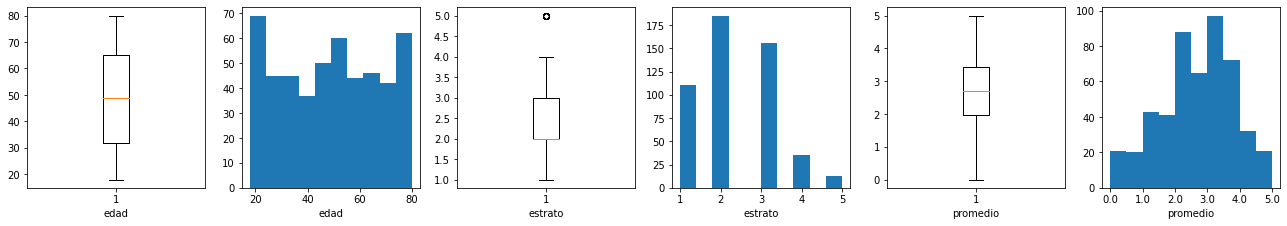

In [4]:
import matplotlib.pyplot       as plt
import numpy as np

def visualizaciones_numericas(datos_numericos=datos_numericos, color_value=None):
  
    cols = 6
    rows = len(datos_numericos)

    num_cols = list(datos_numericos.keys())
    cat_cols = [x for x in data.keys() if x not in num_cols]
    fig = plt.figure( figsize=(3*cols, 3*rows))
    for i, col in enumerate(num_cols):
        actual =2*i+1

        ax=fig.add_subplot(rows,cols,actual)

        plt.boxplot(x = datos_numericos[col])
        plt.xlabel(f'{col}')


     

        ax=fig.add_subplot(rows,cols,actual+1)
        float_var = [float(x) for x in datos_numericos[col]]
        ticks_hack =max(float_var)

        plt.hist(float_var)  
        plt.xlabel(f'{col}')
        y_var= [float(x) for x in datos_numericos[col]]
        
        if col=='promedio':
            plt.xticks(np.arange(min(float_var), 5.5, 1), 
                       np.arange(min(float_var), 5.5,1) )
   
        
    fig.tight_layout()  
    plt.show()
visualizaciones_numericas(datos_numericos=datos_numericos)

In [5]:
def contar_valores(lista_categoria):
    contador={i:0 for i in set(lista_categoria)}
    for val in lista_categoria:
        contador[val]=contador[val]+1
    return contador

contar_valores(escolaridad)

{'Profesional': 117, 'Maestria': 15, 'Secundaria': 343, 'Primaria': 25}

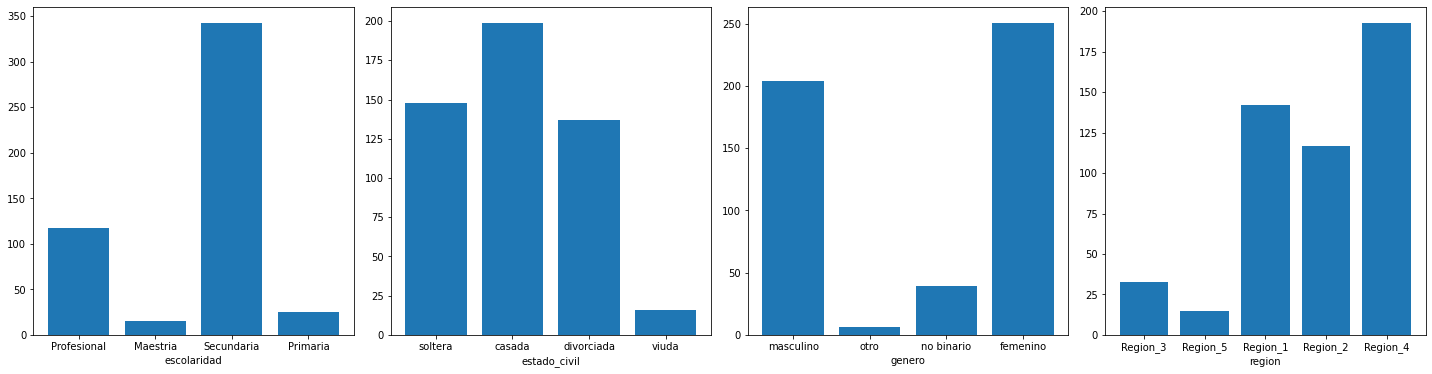

In [6]:
def plot_count_barcharts(lista_categoria):
    data = contar_valores(lista_categoria)
    return plt.bar(data.keys(), data.values())


def visualizaciones_categoricas(datos_cat, datos_cat_names=None):
    
    if datos_cat_names is None:
        datos_cat_names = ['escolaridad', 'estado_civil', 'genero', 'region']
    rows = 2
    cat_cols =datos_cat
    cols = len(cat_cols)
    



    fig = plt.figure( figsize=(5*cols, 5*rows))
    for i, col in enumerate(cat_cols):
            actual =i+1
            ax=fig.add_subplot(rows,cols,actual)
            plot_count_barcharts(list(col))
            plt.xlabel(f'{datos_cat_names[i]}')
           

            fig.tight_layout()  
    plt.show()
visualizaciones_categoricas([ escolaridad, estado_civil,  genero, region])

<BarContainer object of 4 artists>

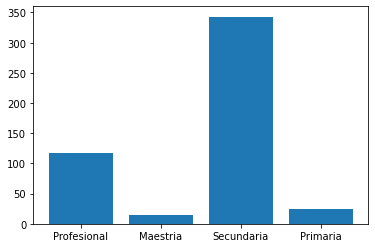

In [7]:
plt.bar(contar_valores(escolaridad).keys(), contar_valores(escolaridad).values())

## Fase 2: abordar la pregunta de negocio

El comité encargado de diseñar el programa de becas ha tenido dificultades para llegar a acuerdos. Algunos piensan que considerar las características sociodemográficas (ej., género, región, etc.) es parte del espíritu del programa, mientras que otros piensan que el criterio de selección debería centrarse estrictamente en lo económico y académico. Dado esto, el comité ha sugerido evaluar dos propuestas, suponiendo un número $N$ de becas disponibles.

* La primera propuesta sugiere que se deben tomar las diferentes regiones y géneros y, para cada una de las combinaciones de estos dos criterios, asignar una cantidad de becas proporcional al número de personas de esa subpoblación con respecto al total de personas encuestadas. Dentro de cada subpoblación, las becas deben aprobarse a las personas con mejor promedio académico.

* La segunda propuesta sugiere que se deben tomar en orden ascendente los estratos y, en cada uno de ellos, asignar una beca a cada una de las personas que se encuentren dentro del 2% con mejor promedio académico en esa subpoblación. En caso de quedar becas disponibles luego de haber cubierto todos los estratos, se repite el mismo esquema hasta asignar todas las becas disponibles, excluyendo a las personas a quienes se les haya asignado una beca en alguna ronda anterior.

### Misión 3

Define la pregunta de negocio y la pregunta de *analytics* para esta situación.

La primera propuesta sugiere que se deben tomar las diferentes regiones y géneros y, para cada una de las combinaciones de estos dos criterios, asignar una cantidad de becas proporcional al número de personas de esa subpoblación con respecto al total de personas encuestadas. Dentro de cada subpoblación, las becas deben aprobarse a las personas con mejor promedio académico

In [8]:
# Implementa tu respuesta en esta celda

pregunta_negocio = '''¿Cómo distribuir las becas a las personas que más la necesiten'''
pregunta_analytics='''¿De qué manera distribuir las becas balanceando lo sociodemográfico, lo económico y académico?'''

### Misión 4

**Versión base**: desarrolla un algoritmo que seleccione a los potenciales beneficiarios de las becas, según la primera propuesta.

**Versión completa**: escribe una función que sea capaz de ejecutar la **versión base** para distintos números $N$ de becas disponibles.

In [9]:
# Implementa tu respuesta en esta celda

# Se cuentan las subpoblaciones en los datos de entrada.
# Los datos de entrada se encuentran ya pre-acomodados en orden del promedio.

becas = 10

def algoritmo_1(becas,data=data, genero=genero, promedio=promedio, region=region):
    diccionario_datos ={i:{promedio[i]:{  'genero':genero[i], 
                                        'region':region[i]}} for i in range(len(genero))}

    datos_ordenados=dict(sorted( diccionario_datos.items(),  key=lambda item: list(item[1].keys()), 
                                reverse=True))


    dict_conteo = dict()
    for i in range(len(data['genero'])):
        pair = (data['genero'][i], data['region'][i])
        if pair not in dict_conteo.keys():
            dict_conteo[pair]=1
        else:
            dict_conteo[pair]=dict_conteo[pair]+1

    # se ordena el conteo de mayor a menor ocurrencia

    dict_conteo=dict(sorted( dict_conteo.items(), key=lambda item: item[1], reverse=True))

    # A partir de los conteos de los sub-grupos, se crea un diccionario de 
    # becas máximas a asignar.
    # Se aproxima hacía arriba para garantizar que haya al menos las becas solicitadas
    # También apoya a que cuando haya menos becas que alumnos (situación muy probable)

    # Este diccionario estára en el orden de más aparición a menor aparición de
    # cada subgrupo en los datos (es decir, el primer valor siempre es el subgrupo
    # más presente en los datos )
    dict_maximos ={key:math.ceil(becas*val/500) for key, val in  dict_conteo.items()}

    # Se crea un diccionario de becas asignadas por subgrupo
    dict_becas  = {key:0 for key in dict_conteo}

    # Se crea una lista de beneficiarios de las becas
    beneficiarios= []

    # Se itera por los subgrupos
    # Esto irá del subgrupo que más aparece
    for pair in dict_conteo:
        # Se itera por los alumnos.
        # Los alumnos están ordenados de mayor a menor promedio
        # Es decir, primero entran los "mejores" alumnos por promedio.
        # La i será en este caso, el # del alumno (fila) en los datos de entrada
        for i in datos_ordenados:

            # Se extraen de los alumnos ordenados
            alumno=datos_ordenados[i]
            region = list(alumno.values())[0]['region']
            genero = list(alumno.values())[0]['genero']
            promedio = list(alumno.keys())[0]



            # Si se tienen ya las becas totales, romper el ciclo
            if len(beneficiarios)<=becas:
                # Solo si el alumno pertenece al subgrupo, validar si
                if (genero, region)==pair:

                    # Se revisa si ya se asignaron las becas máximas a cada subgrupo
                    # Si no se ha llegado al máximo, romper el ciclo
                    if dict_becas[pair]<dict_maximos[pair]:
                        # Se aumenta el contador de becas asignadas al subgrupo
                        dict_becas[pair] = dict_becas[pair] +1
                        # Se agrega el alumno a la lista de beneficiarios
                        beneficiarios.append({i:{pair:alumno}})
                    else:
                        continue 
            else:
                break
    # Por el ceil, el conteo de los items puede exceder las becas asignadas.
    # Con round y con floor, tiende a siempre dar menos que las becas y ademas,
    # tener problemas con la situación en que hay menos becas que alumnos.
    # Así que por si se pasa, se toman solo los primeros 'becas' elementos.

    beneficiarios = beneficiarios[:becas]
    return beneficiarios

algoritmo_1(becas)

[{243: {('femenino',
    'Region_4'): {'5.0': {'genero': 'femenino', 'region': 'Region_4'}}}},
 {60: {('femenino',
    'Region_4'): {'4.9': {'genero': 'femenino', 'region': 'Region_4'}}}},
 {308: {('femenino',
    'Region_4'): {'4.4': {'genero': 'femenino', 'region': 'Region_4'}}}},
 {491: {('masculino',
    'Region_4'): {'4.9': {'genero': 'masculino', 'region': 'Region_4'}}}},
 {159: {('masculino',
    'Region_4'): {'4.6': {'genero': 'masculino', 'region': 'Region_4'}}}},
 {162: {('masculino',
    'Region_1'): {'4.9': {'genero': 'masculino', 'region': 'Region_1'}}}},
 {394: {('masculino',
    'Region_1'): {'4.8': {'genero': 'masculino', 'region': 'Region_1'}}}},
 {363: {('femenino',
    'Region_2'): {'4.9': {'genero': 'femenino', 'region': 'Region_2'}}}},
 {109: {('femenino',
    'Region_2'): {'4.7': {'genero': 'femenino', 'region': 'Region_2'}}}},
 {7: {('femenino',
    'Region_1'): {'4.9': {'genero': 'femenino', 'region': 'Region_1'}}}}]

### Misión 5

**Versión base**: desarrolla un algoritmo que seleccione a los potenciales beneficiarios de las becas, según la segunda propuesta.

**Versión completa**: escribe una función que sea capaz de ejecutar la **versión base** para distintos números $N$ de becas disponibles.

La segunda propuesta sugiere que se deben tomar en orden ascendente los estratos y, en cada uno de ellos, asignar una beca a cada una de las personas que se encuentren dentro del 2% con mejor promedio académico en esa subpoblación. En caso de quedar becas disponibles luego de haber cubierto todos los estratos, se repite el mismo esquema hasta asignar todas las becas disponibles, excluyendo a las personas a quienes se les haya asignado una beca en alguna ronda anterior.

In [10]:
# Implementa tu respuesta en esta celda
becas = 200

def algoritmo_2(becas, estrato=estrato, promedio=promedio):
    diccionario_datos ={i:{estrato[i]:{ 'promedio':promedio[i]}} for i in range(len(promedio))}

    datos_ordenados=dict(sorted( diccionario_datos.items(),  key=lambda item: list(item[1].keys()), 
                                 ))

    asignados=[]



    while len(asignados)<becas:

        for estrato_dado in ['1', '2', '3', '4', '5']:
            if len(asignados)>=becas:
                break


            es_estrato = [x==estrato_dado for x in [list(i.keys())[0] for i in list(datos_ordenados.values())]]

            personas_estrato={key:float(list(val.values())[0]['promedio']) for key, val in datos_ordenados.items() 
                             if (list(val.keys())[0] ==estrato_dado) and
                            (key not in asignados)}
            personas_estrato = dict(sorted( personas_estrato.items(), key=lambda item: item[1], reverse=True))


            dos_porc_superior = list(personas_estrato.keys())[0:math.ceil(len(personas_estrato)*0.02)]

            for i in dos_porc_superior:

                if len(asignados)<=becas-1:

                    asignados.append(i)
                else:
                    break


    return {i:datos_ordenados[i] for i in asignados}
algoritmo_2(becas)

{376: {'1': {'promedio': '5.0'}},
 162: {'1': {'promedio': '4.9'}},
 363: {'1': {'promedio': '4.9'}},
 243: {'2': {'promedio': '5.0'}},
 7: {'2': {'promedio': '4.9'}},
 207: {'2': {'promedio': '4.9'}},
 491: {'2': {'promedio': '4.9'}},
 60: {'3': {'promedio': '4.9'}},
 471: {'3': {'promedio': '4.9'}},
 109: {'3': {'promedio': '4.7'}},
 159: {'3': {'promedio': '4.6'}},
 394: {'4': {'promedio': '4.8'}},
 259: {'5': {'promedio': '4.8'}},
 283: {'1': {'promedio': '4.8'}},
 385: {'1': {'promedio': '4.7'}},
 287: {'1': {'promedio': '4.3'}},
 137: {'2': {'promedio': '4.8'}},
 478: {'2': {'promedio': '4.6'}},
 409: {'2': {'promedio': '4.5'}},
 452: {'2': {'promedio': '4.5'}},
 9: {'3': {'promedio': '4.5'}},
 49: {'3': {'promedio': '4.5'}},
 161: {'3': {'promedio': '4.4'}},
 134: {'3': {'promedio': '4.2'}},
 53: {'4': {'promedio': '3.9'}},
 99: {'5': {'promedio': '3.4'}},
 398: {'1': {'promedio': '4.3'}},
 422: {'1': {'promedio': '4.2'}},
 108: {'1': {'promedio': '4.1'}},
 222: {'2': {'promedio

### Misión 6

**Versión base**: con base en tu desarrollo de las misiones 2, 4 y 5, implementa un procedimiento que le permita al comité comparar las dos propuestas, exponiendo métricas y visualizaciones de las principales características demográficas de los potenciales beneficiarios de las becas que se obtendrían con cada propuesta.

**Versión completa**: escribe una función que sea capaz de ejecutar la **versión base** de manera automática para ambas propuestas.

ELIGIENDO ALUMNOS OPCION 1 PARA 50 becas

ALUMNOS ELEGIDOS OPCION 1: 243, 60, 308, 70, 256, 453, 108, 213, 145, 433, 17, 491, 159, 454, 319, 434, 169, 202, 162, 394, 9, 452, 222, 398, 428, 363, 109, 355, 287, 262, 250, 337, 7, 207, 137, 409, 134, 45, 74, 376, 471, 385, 161, 79, 422, 138, 113, 99, 22, 96


ELIGIENDO ALUMNOS OPCION 2 PARA 50 becas

ALUMNOS ELEGIDOS OPCION 2: 376, 162, 363, 243, 7, 207, 491, 60, 471, 109, 159, 394, 259, 283, 385, 287, 137, 478, 409, 452, 9, 49, 161, 134, 53, 99, 398, 422, 108, 222, 308, 355, 22, 256, 428, 453, 378, 38, 213, 250, 253, 70, 262, 96, 337, 45, 454, 74, 168, 242


________________________________________
MEDIA OPCIONES


OPCION 1:

edad 50.92
estrato 2.26
promedio 4.330000000000001


OPCION 2:

edad 48.48
estrato 2.44
promedio 4.354
________________________________________
________________________________________
MEDIANA OPCIONES


OPCION 1:

edad 34.0
estrato 2.0
promedio 4.4


OPCION 2:

edad 25.0
estrato 1.0
promedio 4.0
____________________

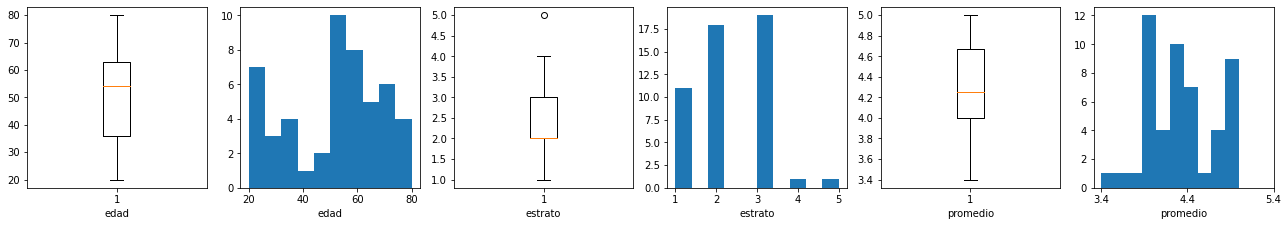

VISUALIZACIONES DATOS NUMERICOS OPCION 2


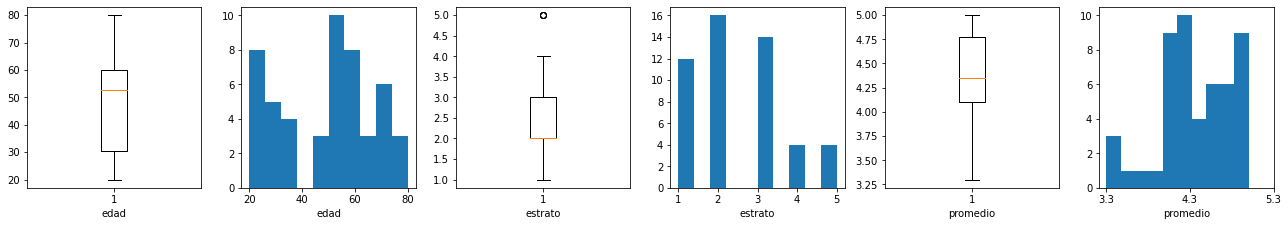

VISUALIZACIONES DATOS CATEGORICOS OPCION 1


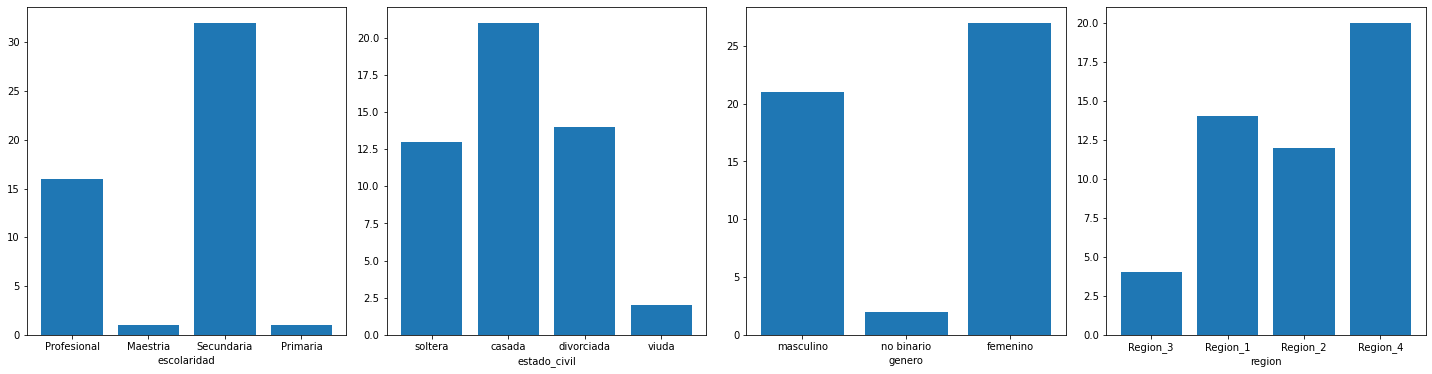

VISUALIZACIONES DATOS CATEGORICOS OPCION 2


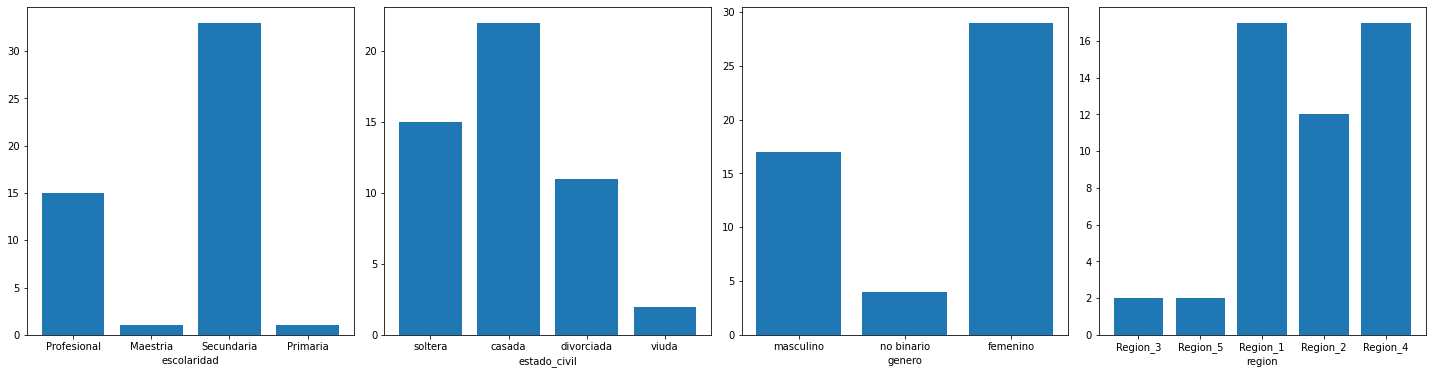

In [11]:
# Implementa tu respuesta en esta celda

def elegir_elementos(lista, indices, numerico=None):
    if numerico:
        return [float(x) for i,x in enumerate(lista) if i in indices]
    else:
        return [x for i,x in enumerate(lista) if i in indices]
    
def presentar_estadisticas(opciones, funcion, texto):
    print('________________________________________')
    print(f"{texto} OPCIONES")
    
    for i, opcion in enumerate(opciones):
        print(f"\n\nOPCION {i+1}:\n")
        [    {print(name, fun(var)) for name,var in opcion.items() } 
            for fun in [funcion]]
    
    print('________________________________________')
        
becas = 5



def comparar_opciones(becas=50):
   



    print(f"ELIGIENDO ALUMNOS OPCION 1 PARA {becas} becas")
    opcion_1= algoritmo_1(becas)
    alumnos_opcion1=[list(x.keys())[0] for x in opcion_1]
    print(f"\nALUMNOS ELEGIDOS OPCION 1: {', '.join([str(x) for x in alumnos_opcion1])}\n\n")
    print(f"ELIGIENDO ALUMNOS OPCION 2 PARA {becas} becas")

    opcion_2= algoritmo_2(becas)
    alumnos_opcion2=list(opcion_2.keys())
    print(f"\nALUMNOS ELEGIDOS OPCION 2: {', '.join([str(x) for x in alumnos_opcion2])}\n\n")




    (escolaridad1, estado_civil1, genero1, region1) =[elegir_elementos(x, alumnos_opcion1) 
                                                      for x in [escolaridad, estado_civil, 
    genero,  region]]

    (edad1,estrato1,promedio1) =[elegir_elementos(x, alumnos_opcion1,numerico=True) for x in [edad, estrato, promedio]]


    (escolaridad2, estado_civil2, genero2, region2) =[elegir_elementos(x, alumnos_opcion2) 
                                                      for x in [escolaridad, estado_civil, 
    genero,  region]]

    (edad2,estrato2,promedio2) =[elegir_elementos(x, alumnos_opcion2,numerico=True) for x in [edad, estrato, promedio]]

    opcion_1_numericos = {'edad':edad1, 'estrato':estrato1, 'promedio':promedio1}
    opcion_2_numericos = {'edad':edad2, 'estrato':estrato2, 'promedio':promedio2}

    fun_dict={'MEDIA':media, 'MEDIANA':mediana, 'VARIANZA':var, 'DESVIACIÓN ESTÁNDAR':std_dev}

    [presentar_estadisticas([opcion_1_numericos,opcion_2_numericos], value, key)for key,value in fun_dict.items()]
    print("VISUALIZACIONES DATOS NUMERICOS OPCION 1")
    visualizaciones_numericas(datos_numericos=opcion_1_numericos)
    print("VISUALIZACIONES DATOS NUMERICOS OPCION 2")

    visualizaciones_numericas(datos_numericos=opcion_2_numericos)


    print("VISUALIZACIONES DATOS CATEGORICOS OPCION 1")
    visualizaciones_categoricas([ escolaridad1, estado_civil1,  genero1, region1])
    print("VISUALIZACIONES DATOS CATEGORICOS OPCION 2")

    visualizaciones_categoricas([ escolaridad2, estado_civil2,  genero2, region2])
comparar_opciones(becas=50)

## Fase 3: desarrollar una solución analítica

Reconociendo la complejidad de este problema y viendo el potencial del análisis de datos para enriquecer la discusión, el comité requiere una herramienta analítica que permita definir y evaluar nuevas propuestas de asignación de becas. Se debe poder:

1. Ingresar el número de becas disponibles (ej., `N=0`).


2. Ingresar un rango de edad para los candidatos factibles (ej., `min_edad=99, max_edad=100`).


3. Elegir cualesquiera de las siguientes tres características: género, estrato, región (ej., `caracteristicas=["genero", "estrato"]`).

    
4. Ingresar interactivamente (durante la ejecución de la herramienta) el porcentaje del total de las becas que se asignará a las personas con mejor promedio académico dentro de cada una de las combinaciones de las características elegidas. Por ejemplo, si se eligen las características `"genero"` y `"estrato"`, deberá asignarse un porcentaje a cada combinación (ej., asignar 3\% de las becas al género `"masculino"` del estrato `1`, asignar 5\% de las becas al género `"femenino"` del estrato `1`, etc.).

La herramienta debe permitir al comité configurar una nueva propuesta y seleccionar al grupo de potenciales beneficiarios de las becas de acuerdo con la propuesta configurada. Además, la herramienta debe exponer métricas y visualizaciones de las principales características demográficas de los potenciales beneficiarios de las becas.

### Misión 7

Desarrolla un algoritmo que reciba los parámetros para configurar la nueva propuesta y seleccione a los potenciales beneficiarios de las becas.

In [12]:
# Implementa tu respuesta en esta celda
import math
combinations = []

def combine(terms, accum):
    last = (len(terms) == 1)
    n = len(terms[0])
    for i in range(n):
        item = accum + "~"+ terms[0][i]
        if last:
            combinations.append(item)
        else:
            combine(terms[1:], item)

(edad, escolaridad, estado_civil, 
 estrato, genero, promedio, region )=[open_file(f"Archivos/{file}.txt")
                                      for file in ["edad", "escolaridad", "estado_civil", 
 "estrato", "genero", "promedio", "region"]]

def combine(terms, accum):
    last = (len(terms) == 1)
    n = len(terms[0])
    for i in range(n):
        item = accum + "~"+ terms[0][i]
        if last:
            combinations.append(item)
        else:
            combine(terms[1:], item)
            
def presentar_estadisticas_single(opcion, funcion, texto):
    print('________________________________________')
    print(f"{texto} OPCIONES\n\nOPCION:\n")
    [    {print(name, fun(var)) for name,var in opcion.items() } 
        for fun in [funcion]]
    print('________________________________________')
            
def input_entero(variable):
    while True:
        try:
            valor = input(f"{variable}: ")
            valor = int(valor)
        except Exception:
            print("El valor ingresado es un entero. Intente nuevamente")
            continue
        break
    return valor

def mision_7():
    
    (edad, escolaridad, estado_civil, 
     estrato, genero, promedio, region )=[open_file(f"Archivos/{file}.txt")
                                          for file in ["edad", "escolaridad", "estado_civil", 
     "estrato", "genero", "promedio", "region"]]
    N=input_entero('Cantidad de becas')
    min_edad=input_entero('Edad mínima: ')
    max_edad =input_entero('Edad máxima: ')

    if max_edad < min_edad:

        while max_edad < min_edad:
            print("\nLa edad máxima debe ser superior a la mínima")
            max_edad =input_entero('Edad máxima: ')


    diccionario_datos ={i:{promedio[i]:{'edad':edad[i], 'escolaridad':escolaridad[i],
                    'estado_civil':estado_civil[i], 'estrato':estrato[i],
       'genero':genero[i], 'region':region[i]}} for i in range(len(edad)) if min_edad<=float(edad[i])<=max_edad}
    datos_ordenados=dict(sorted( diccionario_datos.items(), key=lambda item: list(item[1].keys()), reverse=True))
    opciones_validas = set(['genero', 'estrato', 'region'])

    opciones_caract = ['1: genero',
     '2: estrato',
     '3: region',
     '4: genero; estrato',
     '5: genero; region',
     '6: estrato; region',
     '7: genero; estrato; region'

        ]

    print("\n\nElige la combinación de características a usar:\n")
    print('\n'.join(opciones_caract))

    while True:
        try:
            valor=input()
            if not int(valor) in [1,2,3,4,5,6,7]:
                print("\nNo ha elegido una opción valida")
                raise Exception
        except Exception:
            continue
        break




    caracteristicas=[[y.strip() for y in x.split(":")[1].split(";")] for x in opciones_caract][int(valor)-1]

    print(f'\n\nUsted ha elegido la combinación: {"; ".join(caracteristicas)}')

    combine([[list(set(genero)) if 'genero' in caracteristicas else []][0],
     [list(set(estrato)) if 'estrato' in caracteristicas else []][0],
    [list(set(region)) if 'region' in caracteristicas else []][0]
    ], accum='')
    combinaciones = [x.split('~')[1:] for x in combinations]




    dict_conteo = dict()
    for i, val in list(diccionario_datos.items()):

        pair = tuple([list(val.values())[0][x] for x in caracteristicas])

        if pair not in list(dict_conteo.keys()):
                    dict_conteo[pair]=1
        else:
                    dict_conteo[pair]=dict_conteo[pair]+1

    # se ordena el conteo de mayor a menor ocurrencia

    dict_conteo=dict(sorted( dict_conteo.items(), key=lambda item: item[1], reverse=True))
    print("De acuerdo a la elección, se tienen los siguientes conteos de aplicantes validos.\n")
    print(','.join(caracteristicas))


    [print(i,":", j) for i, j in dict_conteo.items()]

    print("Por favor, asigne el porcentaje de becas para cada una de las categorias")
    print("\nPara esto, ingrese el porcentaje como un número del 0 al 100.")
    print("\nPor ejemplo, ingresar 20 sería ingresar el 20%\n\n")
    por_asignar=100
    porcentajes = []
    for j, i in enumerate(dict_conteo):
        if por_asignar ==0:
            break
        while True:
            try:
                valor = float(input(f"{i}: "))
                if 0<valor<=100:
                    if por_asignar-valor>=0:

                        if j!=(len(dict_conteo)-1) :
                            por_asignar=por_asignar-valor
                            print(f"\nRestante por asignar: {por_asignar}%\n")
                            porcentajes.append(valor)
                        else:
                            if por_asignar-valor!=0:

                                print("\nLos porcentajes deben sumar 100")
                                print(f"\nRestante por asignar: {por_asignar}%\n")
                                raise(Exception)
                            else:
                                por_asignar=por_asignar-valor
                                print(f"\nRestante por asignar: {por_asignar}%\n")
                                porcentajes.append(valor)
                        break

                    else:
                        print("\nEl valor ingresado haría superar el 100% de asignación de becas")
                        raise(Exception)

                else:
                    print("\nEl valor ingresado no está en el rango de 0 a 100")
                    raise(Exception, "El valor ingresado no está en el rango de 0 a 100")
            except Exception:

                print("\nPor favor, ingrese un número valido.\n")
                continue

            break


    asignaciones={list(dict_conteo.keys())[i]:porcentajes[i] for i in range(len(porcentajes))}
    asignaciones = dict(sorted( asignaciones.items(), key=lambda item: item[1], reverse=True))
    print("Porcentajes de asignación:\n")
    [print(i,":", j) for i, j in asignaciones.items()]
    print("\n\n\n")




    asignados=[]

    becas = N
    
    return asignar_mision_7(N,datos_ordenados, caracteristicas, asignaciones), asignaciones
def asignar_mision_7(N,datos_ordenados,caracteristicas, asignaciones):
    asignados=[]

    becas = N
    while len(asignados)<becas:


        for pareja, porcentaje in asignaciones.items():
            cumple_pareja={key: {list(val.keys())[0]:{x:y for (x, y) 
                       in list(val.values())[0].items()}}
                     for key,val in datos_ordenados.items() 
                    if [list(val.values())[0][k] for k in caracteristicas]==list(pareja)}
            cumple_pareja= dict(sorted(cumple_pareja.items(), key=lambda item: list(item[1]), reverse=True))



            porc_superior = list(cumple_pareja.keys())[0:math.ceil(len(cumple_pareja)*(porcentaje/100))]

            for i in porc_superior:

                if len(asignados)<=becas-1:

                    asignados.append(i)

                else:
                    break
    asignados = {i:datos_ordenados[i] for i in asignados}

    print(f"\nDe acuerdo a las elecciones del usuario, se han asignado {len(asignados)} becas de {N}\n")
    print(f"""Este número corresponde a la máxima cantidad de alumnos que cumplen los requisitos demográficos
          designados por el usuario. Si este valor es menor al total de becas, no hay suficientes alumnos
          que cumplan los requisitos dados para asignar ese total de becas\n\n""")


    #_=[print(i,j, "\n") for i,j in asignados.items()]
    return asignados

mision_7()


Cantidad de becas: 20
Edad mínima: : 20
Edad máxima: : 50


Elige la combinación de características a usar:

1: genero
2: estrato
3: region
4: genero; estrato
5: genero; region
6: estrato; region
7: genero; estrato; region
1


Usted ha elegido la combinación: genero
De acuerdo a la elección, se tienen los siguientes conteos de aplicantes validos.

genero
('femenino',) : 135
('masculino',) : 90
('no binario',) : 20
('otro',) : 3
Por favor, asigne el porcentaje de becas para cada una de las categorias

Para esto, ingrese el porcentaje como un número del 0 al 100.

Por ejemplo, ingresar 20 sería ingresar el 20%


('femenino',): 80

Restante por asignar: 20.0%

('masculino',): 20

Restante por asignar: 0.0%

Porcentajes de asignación:

('femenino',) : 80.0
('masculino',) : 20.0





De acuerdo a las elecciones del usuario, se han asignado 20 becas de 20

Este número corresponde a la máxima cantidad de alumnos que cumplen los requisitos demográficos
          designados por el usuario. Si e

({207: {'4.9': {'edad': '21',
    'escolaridad': 'Profesional',
    'estado_civil': 'casada',
    'estrato': '2',
    'genero': 'femenino',
    'region': 'Region_1'}},
  363: {'4.9': {'edad': '32',
    'escolaridad': 'Secundaria',
    'estado_civil': 'casada',
    'estrato': '1',
    'genero': 'femenino',
    'region': 'Region_2'}},
  478: {'4.6': {'edad': '27',
    'escolaridad': 'Secundaria',
    'estado_civil': 'casada',
    'estrato': '2',
    'genero': 'femenino',
    'region': 'Region_5'}},
  308: {'4.4': {'edad': '30',
    'escolaridad': 'Secundaria',
    'estado_civil': 'divorciada',
    'estrato': '2',
    'genero': 'femenino',
    'region': 'Region_4'}},
  287: {'4.3': {'edad': '20',
    'escolaridad': 'Secundaria',
    'estado_civil': 'soltera',
    'estrato': '1',
    'genero': 'femenino',
    'region': 'Region_2'}},
  134: {'4.2': {'edad': '22',
    'escolaridad': 'Secundaria',
    'estado_civil': 'soltera',
    'estrato': '3',
    'genero': 'femenino',
    'region': 'Regi

In [2]:
diccionario_opciones = {'1': [list(set(genero))], 
                        '2': [list(set(estrato))], 
                        '3': [list(set(region))],
                        '4': [list(set(genero)), list(set(estrato))],
                        '5': [list(set(genero)), list(set(region))], 
                        '6': [list(set(estrato)), list(set(region))], 
                        '7': [list(set(genero)), list(set(estrato)), list(set(region))]}

NameError: name 'genero' is not defined

In [3]:
lista_eleccion = {'1': [genero], 
                        '2': [estrato], 
                        '3': [region],
                        '4': [genero[i] + estrato[i] for i in range(len(promedio))], 
                        '5': [genero[i] + region[i]  for i in range(len(promedio))], 
                        '6': [estrato[i] + region[i]  for i in range(len(promedio))], 
                        '7': [genero[i] + estrato[i] +  region[i] for i in range(len(promedio))]}

NameError: name 'genero' is not defined

In [13]:
{('femenino', '1',): 50.0,
  ('femenino', '1', ): 20.0,
  ('masculino', '2', 'Region_4'): 20.0,
  ('masculino', '1', 'Region_1'): 10.0})

SyntaxError: invalid syntax (<ipython-input-13-2dd8cf600345>, line 4)

In [ ]:
{('femenino', '1'): 20,
  ('femenino', '2'): 10.0,
  ('femenino', '3'): 10.0,
  ('femenino', '4'): 10.0,
  ('femenino', '5'): 10.0,
  ('masculino', '1'): 50.0,
  ('masculino', '2'): 10.0,
  ('masculino', '3'): 10.0,
  ('masculino', '4'): 10.0,
  ('masculino', '5'): 10.0,}

In [ ]:
80

### Misión 8

Con base en tu desarrollo de la misión 7, implementa un algoritmo que: le permita al comité configurar una nueva propuesta; exponga métricas y visualizaciones de las principales características demográficas del grupo de potenciales beneficiarios para la propuesta configurada.

Cantidad de becas: 100
Edad mínima: : 10
Edad máxima: : 80


Elige la combinación de características a usar:

1: genero
2: estrato
3: region
4: genero; estrato
5: genero; region
6: estrato; region
7: genero; estrato; region
4


Usted ha elegido la combinación: genero; estrato
De acuerdo a la elección, se tienen los siguientes conteos de aplicantes validos.

genero,estrato
('femenino', '2') : 98
('femenino', '3') : 78
('masculino', '2') : 69
('masculino', '3') : 66
('femenino', '1') : 50
('masculino', '1') : 49
('femenino', '4') : 18
('masculino', '4') : 15
('no binario', '2') : 14
('no binario', '1') : 12
('no binario', '3') : 11
('femenino', '5') : 7
('masculino', '5') : 5
('otro', '2') : 4
('otro', '4') : 1
('no binario', '5') : 1
('no binario', '4') : 1
('otro', '3') : 1
Por favor, asigne el porcentaje de becas para cada una de las categorias

Para esto, ingrese el porcentaje como un número del 0 al 100.

Por ejemplo, ingresar 20 sería ingresar el 20%


('femenino', '2'): 20

Restan

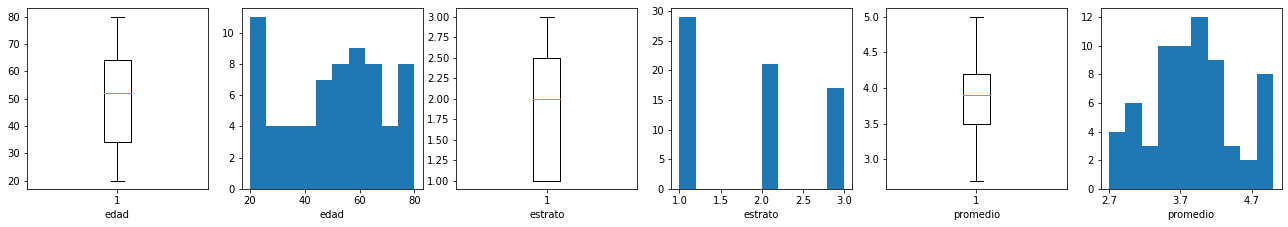

VISUALIZACIONES DATOS CATEGORICOS OPCION 3


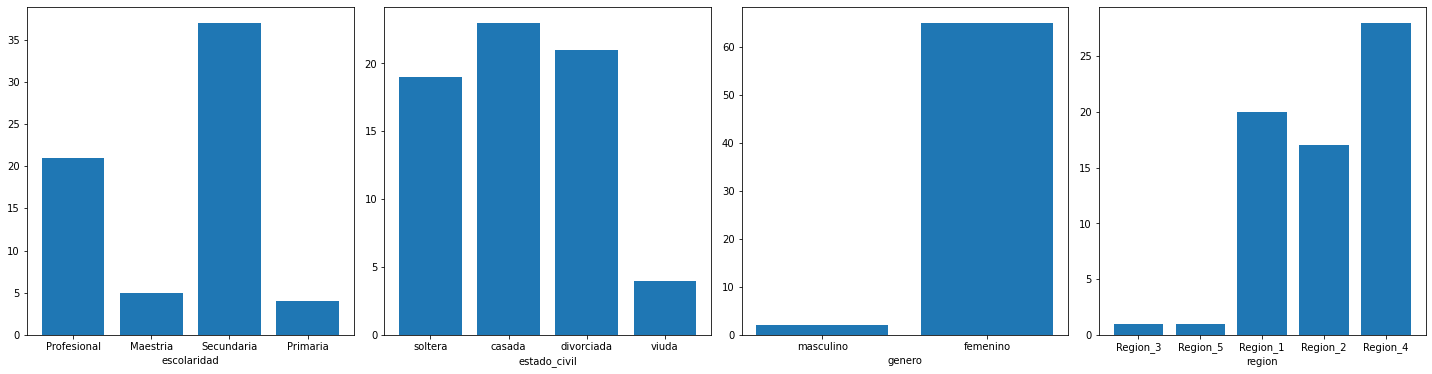

In [14]:
# Implementa tu respuesta en esta celda
opcion3,_=mision_7()


alumnos_opcion3=list(opcion3.keys())
print(f"\nALUMNOS ELEGIDOS OPCION: {', '.join([str(x) for x in alumnos_opcion3])}\n\n")




(escolaridad3, estado_civil3, genero3, region3) =[elegir_elementos(x, alumnos_opcion3) 
                                                      for x in [escolaridad, estado_civil, 
    genero,  region]]

(edad3,estrato3,promedio3) =[elegir_elementos(x, alumnos_opcion3,numerico=True) for x in [edad, estrato, promedio]]


  
opcion_3_numericos = {'edad':edad3, 'estrato':estrato3, 'promedio':promedio3}

fun_dict={'MEDIA':media, 'MEDIANA':mediana, 'VARIANZA':var, 'DESVIACIÓN ESTÁNDAR':std_dev}




[presentar_estadisticas_single(opcion_3_numericos, value, key)for key,value in fun_dict.items()]
print("VISUALIZACIONES DATOS NUMERICOS OPCION 3")
visualizaciones_numericas(datos_numericos=opcion_3_numericos)


print("VISUALIZACIONES DATOS CATEGORICOS OPCION 3")
visualizaciones_categoricas([ escolaridad3, estado_civil3,  genero3, region3])



### Misión 9

Utiliza tu herramienta para configurar propuestas a tu criterio. Con sustento en las métricas y visualizaciones que obtengas, elige una de las propuestas que configuraste. Compara y concluye acerca de las virtudes y falencias de tu propuesta con respecto a las de las dos propuestas del comité.

In [ ]:
# Implementa tu respuesta en esta celda


## Referencias

* Discriminación Positiva<br>
https://es.wikipedia.org/wiki/Discriminaci%C3%B3n_positiva
* Análisis de formulación del programa “Ser Pilo Paga”<br>
https://repository.urosario.edu.co/handle/10336/12526
* La acción afirmativa en la Universidad de los Andes: El caso del programa "Oportunidades para talentos nacionales"<br> http://www.scielo.org.co/scielo.php?script=sci_arttext&pid=S0123-885X2004000300005
* Acción afirmativa y equidad: un análisis desde la propuesta de Thomas Nagel<br>
http://www.scielo.org.mx/scielo.php?script=sci_arttext&pid=S2007-24062016000200049

## Créditos

__Autores__: Camilo Hernando Gómez Castro, Alejandro Mantilla Redondo, Diego Alejandro Cely Gómez.
 
__Fecha última actualización__: 11/07/2022